### Speech Emotion Recognition Using LSTM-RNN

In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wave

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

In [5]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import librosa
import wave
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

print("loaded libraries")

loaded libraries


In [8]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    
    return mfccs

In [10]:
ravdess_speech_labels = []
ravdess_speech_data = []
for dirname, _, filename in os.walk("C:/Users/91905/OneDrive/Desktop/speech-emotion-recognition-ravdess-data (2)/speech-emotion-recognition-ravdess-data"):
    for filename in filename:
        ravdess_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname,filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))
        
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [11]:
ravdess_speech_data

[array([-7.0093744e+02,  6.6999016e+01, -1.2747991e+01,  2.6037918e+01,
        -1.4869267e-01,  6.9992347e+00, -7.0496044e+00, -1.6537246e+00,
        -1.3773560e+01, -8.7100297e-01,  1.3544908e+00, -4.4532223e+00,
         3.1503975e+00, -6.0806613e+00,  2.5016019e+00, -2.4287832e+00,
        -2.2893381e+00, -3.1503279e+00, -5.7942271e-01, -5.4310149e-01,
        -5.0917797e+00, -9.7407734e-01, -2.3107798e+00, -4.3557258e+00,
        -1.1794850e+00, -1.3651040e+00, -5.0731807e+00,  1.1156076e+00,
        -2.1164734e+00, -4.2820930e-01, -7.3828286e-01, -3.5756197e+00,
        -1.1529218e+00, -3.5323257e+00, -1.9253587e+00, -1.8755027e+00,
        -3.8114399e-01, -3.7994223e+00, -2.5737705e+00, -2.6911376e+00],
       dtype=float32),
 array([-6.9862097e+02,  6.8071419e+01, -9.4942827e+00,  2.2356730e+01,
        -2.3780174e+00,  7.4287715e+00, -7.0072808e+00, -2.0184124e+00,
        -1.2320486e+01, -3.0015483e+00,  8.1189710e-01, -4.0309844e+00,
         3.4207709e+00, -5.5355630e+00, 

In [12]:
ravdess_speech_data_array = np.asarray(ravdess_speech_data)
ravdess_speech_label_array = np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical = to_categorical(ravdess_speech_label_array)
labels_categorical.shape

(1439, 8)

In [16]:
ravdess_speech_data_array.shape

(1439, 40)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [21]:
#split the training, validatinh and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [19]:
#define the LSTM Model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    #configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [22]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [23]:
w.shape

(1151, 40, 1)

In [24]:
# train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1),labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=130, shuffle=True)

Epoch 1/130
36/36 [==============================] - 5s 47ms/step - loss: 2.0847 - accuracy: 0.1260 - val_loss: 2.0846 - val_accuracy: 0.1259
Epoch 2/130
36/36 [==============================] - 2s 58ms/step - loss: 2.0613 - accuracy: 0.1607 - val_loss: 2.0792 - val_accuracy: 0.1538
Epoch 3/130
36/36 [==============================] - 2s 52ms/step - loss: 2.0509 - accuracy: 0.1703 - val_loss: 2.0454 - val_accuracy: 0.1888
Epoch 4/130
36/36 [==============================] - 2s 52ms/step - loss: 2.0305 - accuracy: 0.2033 - val_loss: 2.0238 - val_accuracy: 0.1469
Epoch 5/130
36/36 [==============================] - 1s 35ms/step - loss: 2.0024 - accuracy: 0.2129 - val_loss: 1.9914 - val_accuracy: 0.2028
Epoch 6/130
36/36 [==============================] - 1s 41ms/step - loss: 1.9845 - accuracy: 0.2120 - val_loss: 1.9882 - val_accuracy: 0.1748
Epoch 7/130
36/36 [==============================] - 2s 55ms/step - loss: 1.9850 - accuracy: 0.2302 - val_loss: 1.9673 - val_accuracy: 0.2168
Epoch 

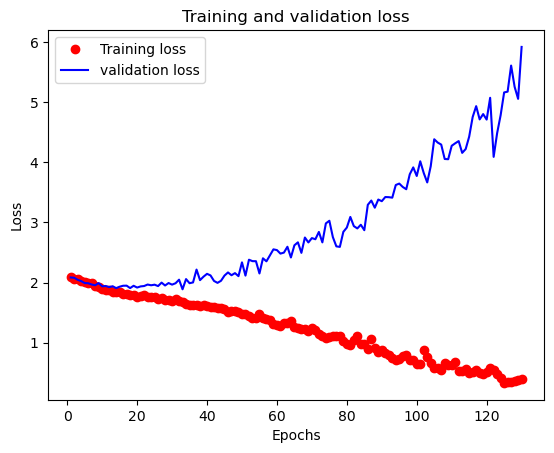

In [26]:
#loss plots using LSTM Model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

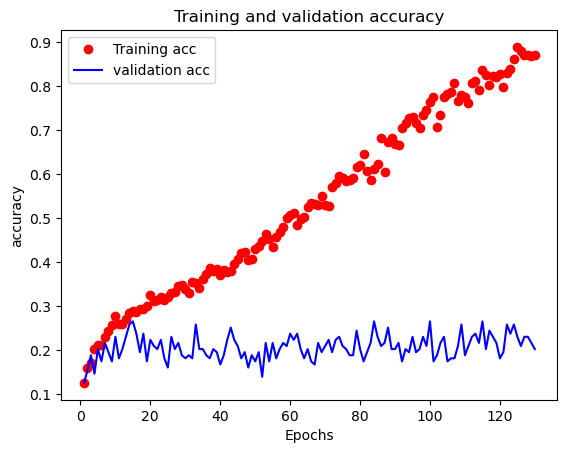

In [28]:
#accuracy plots using LSTM Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [30]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

5/5 [==============================] - 0s 19ms/step - loss: 4.1167 - accuracy: 0.3586


[4.1166887283325195, 0.35862070322036743]

In [31]:
#emotions in the dataset
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
    test_point=extract_mfcc(wav_filepath)
    test_point=np.reshape(test_point,newshape=(1,40,1))
    predictions=model_A.predict(test_point)
    print(emotions[np.argmax(predictions[0])+1])

In [33]:
predict("C:/Users/91905/OneDrive/Desktop/speech-emotion-recognition-ravdess-data (2)/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-02-01.wav")

1/1 [==============================] - 1s 821ms/step
calm


In [34]:
predict("C:/Users/91905/OneDrive/Desktop/speech-emotion-recognition-ravdess-data (2)/speech-emotion-recognition-ravdess-data/Actor_24/03-01-01-01-02-01-24.wav")

1/1 [==============================] - 0s 41ms/step
sad


In [35]:
predict("C:/Users/91905/OneDrive/Desktop/speech-emotion-recognition-ravdess-data (2)/speech-emotion-recognition-ravdess-data/Actor_20/03-01-01-01-02-02-20.wav")

1/1 [==============================] - 0s 42ms/step
neutral


In [36]:
predict("C:/Users/91905/OneDrive/Desktop/speech-emotion-recognition-ravdess-data (2)/speech-emotion-recognition-ravdess-data/Actor_17/03-01-01-01-02-01-17.wav")

1/1 [==============================] - 0s 42ms/step
neutral


In [37]:
predict("C:/Users/91905/OneDrive/Desktop/speech-emotion-recognition-ravdess-data (2)/speech-emotion-recognition-ravdess-data/Actor_10/03-01-02-01-02-02-10.wav")

1/1 [==============================] - 0s 45ms/step
calm
